In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_1=pd.read_csv("Dataset.csv")
df_1.head()

res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   

      locality   latitude  longitude  ... price_range  currency  \
0     Khandari  27.211450  78.002381  ...           2       Rs.   
1   Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2     Shahganj  27.182938  77.979684  ...           1       Rs.   
3  Civil Lines  27.205668  78.004799  ...           1       Rs.   
4      Tajganj  27.157709  78.052421  ...           3       Rs.   

                                          highlights aggregate_rating  \
0  ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1  ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2  ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3  ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4  ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   

  rating_text  votes  photo_count opentable_support delivery  takeaway  
0   Very Good    814          154               0.0       -1        -1  
1   Very Good   1203          161               0.0       -1        -1  
2   Very Good    801          107               0.0        1        -1  
3   Very Good    693          157               0.0        1        -1  
4   Excellent    470          291               0.0        1        -1  

[5 rows x 26 columns]

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [4]:
df_2 = df_1.copy(deep=True)

# Data Cleaning and Preparation

## Handle missing values

#### Calculating Number of Missing values

In [5]:
print("Number of Missing values in Rows")
print(df_2.isnull().sum())
print("*********************************")
print("Percentage of Missing values in Rows")
print(df_2.isnull().mean()*100)
print("*********************************")

Number of Missing values in Rows
res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64
*********************************
Percentage of Missing values in Rows
res_id                   0.000000
name                     0.000000
establish

In [6]:
df_2.drop("zipcode", axis=1, inplace=True)

The "zip code" column has a significantly high percentage of missing values at approximately 77%, which exceeds a threshold where imputation may not be practical or reliable.

In [7]:
rows_with_missing_values = df_2[df_2.isnull().any(axis=1)]
rows_with_missing_values.to_csv('rows_with_missing_values', index=False)

Creating a new file of our dataset serves multiple critical purposes. Firstly, it ensures data preservation by saving a duplicate of the dataset under a different filename or format, thereby safeguarding the original data from accidental loss or irreversible changes. Secondly, it facilitates version control, enabling the establishment of a system to track changes and modifications made to the dataset, which proves particularly valuable when tasks such as removing rows or imputing missing values are undertaken. This way, we always have the option to reference the pristine original dataset if necessary. Additionally, maintaining a separate copy of the dataset supports data provenance by helping us monitor the source and history of the data. This provenance is essential for activities like auditing, documenting data transformations, and ensuring data traceability, all of which play crucial roles in research and data-driven decision-making.
 

In [8]:
cuisines_mode = df_2['cuisines'].mode()[0]
df_2['cuisines'].fillna(cuisines_mode, inplace=True)
updated_missing_values = df_2['cuisines'].isnull().sum()
print("Mode of 'cuisines':", cuisines_mode)
print("Missing values in 'cuisines' after replacement:", updated_missing_values)


Mode of 'cuisines': North Indian
Missing values in 'cuisines' after replacement: 0


I've opted to replace missing values in the "cuisines" column with the mode (most frequent value) due to several key considerations. Firstly, "cuisines" is a categorical column, making the mode a suitable choice for imputation, as it represents the most frequently occurring cuisine category. Secondly, the proportion of missing values in this column is relatively low in comparison to the dataset's overall size, making the impact of imputation minimal. This approach maintains data completeness while simplifying data processing. Lastly, the simplicity and practicality of using the mode align with the goal of preserving data integrity and facilitating subsequent analyses, making it a reasonable strategy for handling the missing "cuisines" data.

In [9]:
columns_with_missing = ["address", "timings", "opentable_support"]
df_2.dropna(subset=columns_with_missing, inplace=True)

I've opted to eliminate rows containing missing values in the "address," "timings," and "opentable_support" columns because the number of missing entries in these columns is relatively minor compared to the dataset's overall size. This strategic omission allows for a more streamlined and efficient analysis, ensuring that our research remains targeted and data quality is upheld. The decision to drop these rows is driven by the limited impact these missing values have on our analysis and the challenges associated with accurately imputing data in columns like "address" and "timings." By doing so, we aim to simplify data processing, reduce complexity, and maintain the contextual relevance of our research while optimising the dataset for further exploration and investigation.
 

In [10]:
print("Percentage of Missing values in Rows")
print(df_2.isnull().mean()*100)

Percentage of Missing values in Rows
res_id                  0.0
name                    0.0
establishment           0.0
url                     0.0
address                 0.0
city                    0.0
city_id                 0.0
locality                0.0
latitude                0.0
longitude               0.0
country_id              0.0
locality_verbose        0.0
cuisines                0.0
timings                 0.0
average_cost_for_two    0.0
price_range             0.0
currency                0.0
highlights              0.0
aggregate_rating        0.0
rating_text             0.0
votes                   0.0
photo_count             0.0
opentable_support       0.0
delivery                0.0
takeaway                0.0
dtype: float64


In [11]:
print("Number of duplicate rows:", df_2.duplicated().sum())


Number of duplicate rows: 148704


In [12]:
print("shape_before =",df_2.shape)
df_2.drop_duplicates(inplace=True)
print("shape_after =",df_2.shape)

shape_before = (208033, 25)
shape_after = (59329, 25)


In [13]:
df_3 = df_2.copy(deep=True)

#### Correct inconsistencies (data types, mislabeled categories).

In [14]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59329 entries, 0 to 211942
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                59329 non-null  int64  
 1   name                  59329 non-null  object 
 2   establishment         59329 non-null  object 
 3   url                   59329 non-null  object 
 4   address               59329 non-null  object 
 5   city                  59329 non-null  object 
 6   city_id               59329 non-null  int64  
 7   locality              59329 non-null  object 
 8   latitude              59329 non-null  float64
 9   longitude             59329 non-null  float64
 10  country_id            59329 non-null  int64  
 11  locality_verbose      59329 non-null  object 
 12  cuisines              59329 non-null  object 
 13  timings               59329 non-null  object 
 14  average_cost_for_two  59329 non-null  int64  
 15  price_range           5

In [15]:
df_3.head()

res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   

      locality   latitude  longitude  ...  price_range currency  \
0     Khandari  27.211450  78.002381  ...            2      Rs.   
1   Agra Cantt  27.160569  78.011583  ...            2      Rs.   
2     Shahganj  27.182938  77.979684  ...            1      Rs.   
3  Civil Lines  27.205668  78.004799  ...            1      Rs.   
4      Tajganj  27.157709  78.052421  ...            3      Rs.   

                                          highlights aggregate_rating  \
0  ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1  ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2  ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3  ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4  ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   

   rating_text  votes photo_count opentable_support  delivery takeaway  
0    Very Good    814         154               0.0        -1       -1  
1    Very Good   1203         161               0.0        -1       -1  
2    Very Good    801         107               0.0         1       -1  
3    Very Good    693         157               0.0         1       -1  
4    Excellent    470         291               0.0         1       -1  

[5 rows x 25 columns]

In [16]:
df_3=pd.read_csv("df_3.csv")

Observation on Data Cleaning in 'Establishment' and 'Timings' Columns:

During the data cleaning process, a detailed inspection of the 'establishment' and 'timings' columns was conducted. This examination revealed the presence of special characters within these columns, potentially impacting the consistency and analysis of the data. To rectify this, Excel's find and replace function was employed to systematically identify and replace these special characters with appropriate substitutes, ensuring uniformity and accuracy in the dataset. This intervention is vital for maintaining data integrity and ensuring reliable analysis outcomes.

In [17]:
df_3.head()

res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   

      locality   latitude  longitude  ...  price_range currency  \
0     Khandari  27.211450  78.002381  ...            2      Rs.   
1   Agra Cantt  27.160569  78.011583  ...            2      Rs.   
2     Shahganj  27.182938  77.979684  ...            1      Rs.   
3  Civil Lines  27.205668  78.004799  ...            1      Rs.   
4      Tajganj  27.157709  78.052421  ...            3      Rs.   

                                          highlights aggregate_rating  \
0  ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1  ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2  ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3  ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4  ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   

   rating_text  votes photo_count opentable_support  delivery takeaway  
0    Very Good    814         154                 0        -1       -1  
1    Very Good   1203         161                 0        -1       -1  
2    Very Good    801         107                 0         1       -1  
3    Very Good    693         157                 0         1       -1  
4    Excellent    470         291                 0         1       -1  

[5 rows x 25 columns]

In [18]:
df_3.shape

(59329, 25)

## Feature engineering

In [19]:
from sklearn.neighbors import NearestNeighbors


# Feature Engineering 1: Cuisine Count
# Splitting the 'cuisines' column and counting the number of cuisines
df_3['cuisine_count'] = df_3['cuisines'].str.split(', ').apply(lambda x: len(x) if isinstance(x, list) else 0)





Cuisine Count (cuisine_count):

What We Did: Created a new feature that counts the number of cuisines each restaurant offers. This was achieved by splitting the 'cuisines' column and counting the individual cuisines listed for each restaurant.
Why We Did It: This feature helps to quantify the variety a restaurant offers. The diversity of cuisines can be a significant factor in attracting customers, and it might correlate with the restaurant's popularity or ratings.


In [20]:
# Feature Engineering 2: Restaurant Density
# Using NearestNeighbors to calculate the density of restaurants within a certain radius
# Assuming a radius of 1 km for this example
coordinates = df_3[['latitude', 'longitude']].dropna()
nbrs = NearestNeighbors(radius=1/111, metric='haversine').fit(np.radians(coordinates))  # 1 degree is approx 111 km
radius = 1/111  # 1 km in degree
restaurant_density = nbrs.radius_neighbors(np.radians(coordinates), return_distance=False)
df_3['restaurant_density'] = [len(neighbors) for neighbors in restaurant_density]




Restaurant Density (restaurant_density):

What We Did: Calculated the number of restaurants within a 1 km radius of each restaurant, using their geographical coordinates (latitude and longitude). This involved spatial analysis to determine the proximity of nearby restaurants.
Why We Did It: This feature provides insight into the competitive landscape. A higher density of restaurants in an area could indicate a more competitive environment, potentially impacting a restaurant's business strategy and customer acquisition.


In [21]:
# Feature Engineering 3: Text Analysis of Highlights
# Assuming we want to extract a few key features like 'Wifi', 'Outdoor Seating'
# Create binary columns for these features
def extract_feature(highlights, feature):
    if isinstance(highlights, str):
        return int(feature in highlights)
    else:
        return 0

features_to_extract = ['Wifi', 'Outdoor Seating']
for feature in features_to_extract:
    df_3[f'has_{feature.replace(" ", "_").lower()}'] = df_3['highlights'].apply(lambda x: extract_feature(x, feature))

# Showing a sample of the new features in the dataframe
df_3[['cuisine_count', 'restaurant_density', 'has_wifi', 'has_outdoor_seating']].head()

cuisine_count  restaurant_density  has_wifi  has_outdoor_seating
0              5                 848         0                    0
1              6                 848         0                    0
2              2                 848         0                    1
3              4                 848         0                    0
4              3                 848         1                    1

Text Analysis of Highlights - has_wifi and has_outdoor_seating:

What We Did: Analyzed the 'highlights' text data to extract specific features offered by restaurants, creating binary columns (has_wifi, has_outdoor_seating) that indicate whether a restaurant offers Wifi and outdoor seating, respectively.
Why We Did It: These features help in understanding the amenities and services that might attract customers. Amenities like Wifi and outdoor seating could enhance a restaurant's appeal and potentially influence its ratings and customer flow.

In [22]:
df_3.head()

res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   

      locality   latitude  longitude  ...  rating_text votes photo_count  \
0     Khandari  27.211450  78.002381  ...    Very Good   814         154   
1   Agra Cantt  27.160569  78.011583  ...    Very Good  1203         161   
2     Shahganj  27.182938  77.979684  ...    Very Good   801         107   
3  Civil Lines  27.205668  78.004799  ...    Very Good   693         157   
4      Tajganj  27.157709  78.052421  ...    Excellent   470         291   

  opentable_support  delivery  takeaway cuisine_count restaurant_density  \
0                 0        -1        -1             5                848   
1                 0        -1        -1             6                848   
2                 0         1        -1             2                848   
3                 0         1        -1             4                848   
4                 0         1        -1             3                848   

   has_wifi has_outdoor_seating  
0         0                   0  
1         0                   0  
2         0                   1  
3         0                   0  
4         1                   1  

[5 rows x 29 columns]

## Exploratory Data Analysis:

Descriptive Statistics: Summarize central tendency, dispersion, and shape of the dataset's distribution.
Distribution Analysis: Analyze the distribution of key variables like ratings, price range, cuisines.
Correlation Analysis: Examine relationships between different variables.

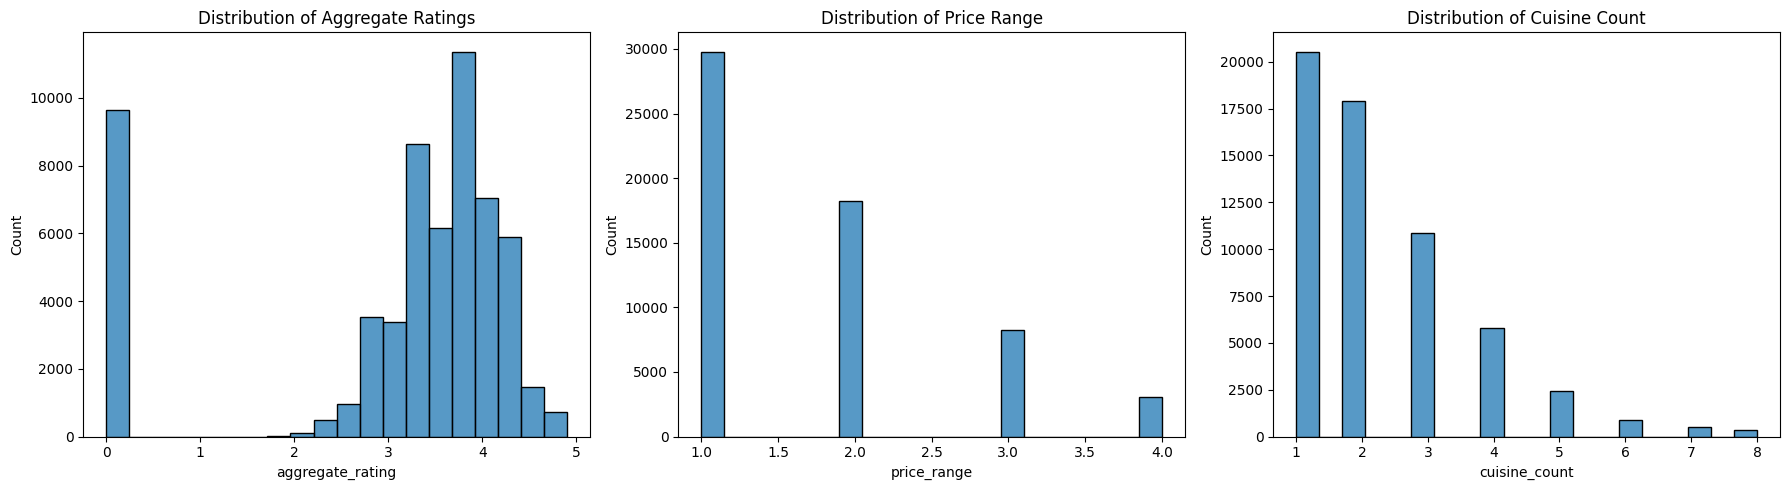

In [23]:

# Descriptive Statistics
descriptive_stats = df_3.describe()

# Distribution Analysis
# Analyzing the distribution of key variables - 'aggregate_rating', 'price_range', 'cuisine_count'
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_3['aggregate_rating'], bins=20, ax=ax[0])
ax[0].set_title('Distribution of Aggregate Ratings')

sns.histplot(df_3['price_range'], bins=20, ax=ax[1])
ax[1].set_title('Distribution of Price Range')

sns.histplot(df_3['cuisine_count'], bins=20, ax=ax[2])
ax[2].set_title('Distribution of Cuisine Count')

plt.tight_layout()

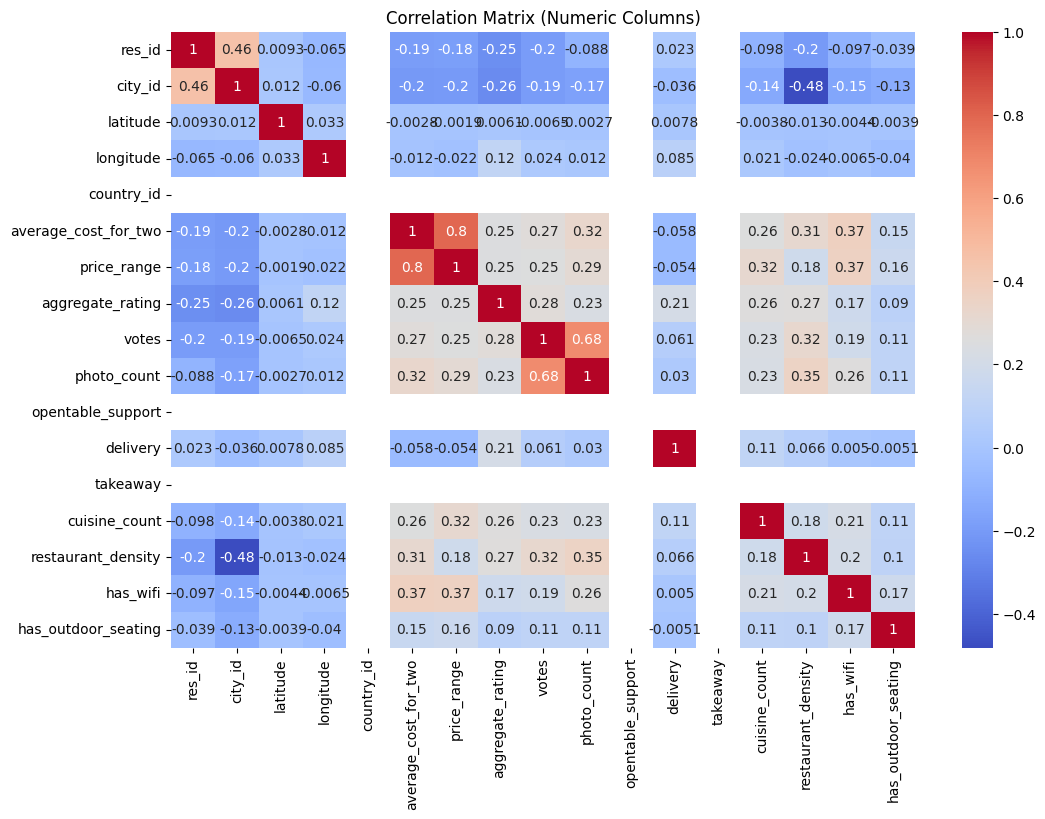

res_id   city_id  latitude  longitude  country_id  \
res_id                1.000000  0.459282  0.009278  -0.065448         NaN   
city_id               0.459282  1.000000  0.012489  -0.060005         NaN   
latitude              0.009278  0.012489  1.000000   0.033154         NaN   
longitude            -0.065448 -0.060005  0.033154   1.000000         NaN   
country_id                 NaN       NaN       NaN        NaN         NaN   
average_cost_for_two -0.191451 -0.203946 -0.002817  -0.011768         NaN   
price_range          -0.182731 -0.199802 -0.001878  -0.021571         NaN   
aggregate_rating     -0.248541 -0.257986  0.006086   0.118630         NaN   
votes                -0.197504 -0.194664 -0.006450   0.023788         NaN   
photo_count          -0.088190 -0.171220 -0.002690   0.012171         NaN   
opentable_support          NaN       NaN       NaN        NaN         NaN   
delivery              0.022661 -0.036191  0.007754   0.085456         NaN   
takeaway                   NaN       NaN       NaN        NaN         NaN   
cuisine_count        -0.097648 -0.135738 -0.003811   0.021332         NaN   
restaurant_density   -0.201686 -0.481592 -0.012563  -0.023895         NaN   
has_wifi             -0.096907 -0.152534 -0.004395  -0.006510         NaN   
has_outdoor_seating  -0.039236 -0.127229 -0.003889  -0.039579         NaN   

                      average_cost_for_two  price_range  aggregate_rating  \
res_id                           -0.191451    -0.182731         -0.248541   
city_id                          -0.203946    -0.199802         -0.257986   
latitude                         -0.002817    -0.001878          0.006086   
longitude                        -0.011768    -0.021571          0.118630   
country_id                             NaN          NaN               NaN   
average_cost_for_two              1.000000     0.795574          0.251506   
price_range                       0.795574     1.000000          0.253263   
aggregate_rating                  0.251506     0.253263          1.000000   
votes                             0.272607     0.253883          0.277522   
photo_count                       0.323990     0.294106          0.230328   
opentable_support                      NaN          NaN               NaN   
delivery                         -0.057719    -0.053784          0.210169   
takeaway                               NaN          NaN               NaN   
cuisine_count                     0.255895     0.315461          0.263018   
restaurant_density                0.312158     0.182175          0.269642   
has_wifi                          0.369733     0.368673          0.172922   
has_outdoor_seating               0.145640     0.161597          0.090151   

                         votes  photo_count  opentable_support  delivery  \
res_id               -0.197504    -0.088190                NaN  0.022661   
city_id              -0.194664    -0.171220                NaN -0.036191   
latitude             -0.006450    -0.002690                NaN  0.007754   
longitude             0.023788     0.012171                NaN  0.085456   
country_id                 NaN          NaN                NaN       NaN   
average_cost_for_two  0.272607     0.323990                NaN -0.057719   
price_range           0.253883     0.294106                NaN -0.053784   
aggregate_rating      0.277522     0.230328                NaN  0.210169   
votes                 1.000000     0.676102                NaN  0.061257   
photo_count           0.676102     1.000000                NaN  0.030403   
opentable_support          NaN          NaN                NaN       NaN   
delivery              0.061257     0.030403                NaN  1.000000   
takeaway                   NaN          NaN                NaN       NaN   
cuisine_count         0.231248     0.228173                NaN  0.111343   
restaurant_density    0.318758     0.353105                NaN  0.065983   
has_wifi              0.189735    

In [24]:
# Selecting only numeric columns for correlation analysis
numeric_columns = df_3.select_dtypes(include=[np.number])
correlation_matrix_numeric = numeric_columns.corr()

# Plotting the correlation matrix for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Columns)")
plt.show()

correlation_matrix_numeric



The descriptive statistics provide a comprehensive overview of the dataset's central tendency, dispersion, and distribution shape for various numerical columns. Here are some key takeaways:

Average Cost for Two: The average cost varies widely (standard deviation of 603), indicating a diverse range of restaurant types from budget-friendly to high-end.
Price Range: Most restaurants fall within the lower price ranges, with a median price range of 2.
Aggregate Rating: The average rating is around 3.06, with a standard deviation of 1.42, suggesting a wide variation in customer satisfaction.
Votes: There's a significant variation in the number of votes per restaurant, as indicated by the large standard deviation.
Cuisine Count: Restaurants offer an average of about 2.3 cuisines, with some offering up to 8 different types.
Restaurant Density: On average, there are about 1268 restaurants within a 1 km radius of each restaurant, indicating a competitive market.
Distribution Analysis:
Aggregate Ratings: The distribution of aggregate ratings shows a wide spread, indicating varying levels of customer satisfaction across restaurants.
Price Range: Most restaurants are concentrated in the lower price ranges, suggesting a prevalence of more budget-friendly options.
Cuisine Count: A large number of restaurants offer a limited number of cuisines, with a decrease in frequency as the cuisine count increases.
Correlation Analysis:
The correlation matrix reveals the relationships between various numerical variables. Key observations include:

There are some correlations between average cost, price range, and aggregate ratings, which could indicate that higher-priced restaurants tend to have higher ratings.
The correlation between restaurant density and other variables is relatively low, suggesting that factors like the number of nearby restaurants might not significantly influence ratings or price.
These analyses provide valuable insights into the dataset, laying the groundwork for deeper exploratory data analysis, hypothesis testing, and model building. Understanding these patterns is crucial for making informed decisions in designing targeted marketing strategies for the restaurant chain. ​

## Regional Analysis Summary

In [25]:
# Regional Analysis: Comparing restaurant trends and customer preferences across different cities

# Grouping data by 'city' and calculating mean values for key variables
regional_analysis = df_3.groupby('city').agg({
    'aggregate_rating': 'mean',
    'average_cost_for_two': 'mean',
    'price_range': 'mean',
    'cuisine_count': 'mean',
    'restaurant_density': 'mean',
    'has_wifi': 'mean',
    'has_outdoor_seating': 'mean',
    'votes': 'mean'
}).sort_values(by='aggregate_rating', ascending=False)

# Displaying the top 10 cities with highest average ratings
top_cities_by_rating = regional_analysis.sort_values(by='aggregate_rating', ascending=False).head(10)

# Displaying the top 10 cities with lowest average ratings
bottom_cities_by_rating = regional_analysis.sort_values(by='aggregate_rating', ascending=True).head(10)

# Identifying unique characteristics of the dining scene in each region
# This can be done by observing the trends and patterns in the regional analysis data
# Displaying a sample for an overview
sample_regional_analysis = regional_analysis.head(10)
sample_regional_analysis, top_cities_by_rating, bottom_cities_by_rating



(              aggregate_rating  average_cost_for_two  price_range  \
 city                                                                
 Gurgaon               3.872549           1025.384615     2.226244   
 Secunderabad          3.848454            506.185567     1.577320   
 Mumbai                3.795863           1101.773050     2.257289   
 Hyderabad             3.776852            848.762731     2.027778   
 New Delhi             3.770005           1018.305360     2.103952   
 Kolkata               3.767116            707.689582     1.806520   
 Bangalore             3.729454            811.972069     1.965298   
 Chennai               3.667764            708.369066     1.806662   
 Noida                 3.651648            759.816850     1.864469   
 Navi Mumbai           3.546094            752.382812     1.957031   
 
               cuisine_count  restaurant_density  has_wifi  \
 city                                                        
 Gurgaon            2.921569      

The analysis reveals notable trends and customer preferences across different cities or regions in India. Here's a summary focusing on the top and bottom cities based on average aggregate ratings:

### Top Cities by Aggregate Rating:
Cities like Gurgaon, Secunderabad, and Hyderabad top the list with the highest average ratings. These cities tend to have higher average costs for two, reflecting perhaps a more upscale dining scene.
Restaurant Density: Cities like Mumbai and New Delhi show very high restaurant density, indicating a competitive market. However, these cities also maintain high average ratings, suggesting a quality dining experience.
Amenities: Features like Wifi and outdoor seating are more prevalent in these top-rated cities, which might contribute to their higher ratings.
### Bottom Cities by Aggregate Rating:
Cities like Alappuzha, Pushkar, and Palakkad are at the lower end of the average rating spectrum. The average cost for two in these cities is lower compared to the top-rated cities.
Cuisine Variety: The cuisine count is generally lower in these cities, indicating less variety in the culinary offerings.
Restaurant Density and Amenities: These cities have lower restaurant densities and fewer amenities like Wifi and outdoor seating.
#### Unique Characteristics of Dining Scene in Each Region:
### High-Rated Cities:
Generally have a higher average cost, more cuisine variety, and better amenities. This suggests a more diverse and possibly more upscale dining environment.
#### Low-Rated Cities: 
Tend to have lower costs, less variety in cuisines, and fewer amenities, which might reflect a more casual or traditional dining scene.
​

## Customer Preference Analysis

In [26]:
cuisines_by_city = pd.Series(df_3['cuisines'].str.cat(sep=', ').split(', ')).value_counts()
top_cuisines = cuisines_by_city.nlargest(10)

# Plotting top cuisines
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


#### Popular Cuisines Overall:

The most popular cuisines across the dataset are North Indian, Chinese, and Fast Food, indicating a strong preference for these flavors among customers.
Desserts and Beverages also rank high, suggesting a significant market for these categories.
South Indian, Continental, Bakery, Cafe, and Italian cuisines follow, reflecting a diverse range of culinary preferences.


## Observation

This Insight into customer preferences and popularity can guide strategic decisions in targeting specific cuisines and understanding the importance of ratings in customer choice. The popularity of certain cuisines can inform menu selections and marketing campaigns, this relationship help in customer satisfaction and its impact on a restaurant's success.

## Competitive Analysis

Identifying Major Competitors: I"ll look at the most prevalent restaurant types and those with the highest ratings or most votes to identify key players in various regions or overall.

Analysing Strengths and Weaknesses: I'll examine factors like cuisine variety, average cost, amenities (WiFi and outdoor seating), and restaurant density to understand the competitive advantages or disadvantages.

Cuisine-Based Competition: I'll identify the most popular cuisines and see which restaurants are leading in those categories.

In [27]:
top_competitors_by_rating = df_3.sort_values(by='aggregate_rating', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(top_competitors_by_rating['name'], top_competitors_by_rating['aggregate_rating'], color='skyblue')
plt.title('Top 10 Best Rated Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

#### Major Competitors by Ratings:

The top competitors, based on ratings, feature a variety of cuisines and are spread across different cities. They generally have high aggregate ratings, suggesting excellence in service and quality.
Major Competitors by Votes:

The restaurants with the most votes indicate popularity and customer engagement. This list includes restaurants that have successfully attracted a large number of customers and maintained a positive reputation.
Strengths and Weaknesses of Top Competitors:

The strengths of these top-rated competitors lie in their diverse cuisines, ranging from Continental and Italian to Indian varieties.
They tend to operate in the higher price ranges, suggesting a focus on quality and a potentially upscale dining experience.
Leaders in Popular Cuisines:

For each popular cuisine, there are standout restaurants that lead in ratings. This shows the competitive landscape across different culinary preferences.
Restaurants leading in cuisines like "North Indian" and "Italian" are among those with the highest ratings, indicating their strong position in these segments.

## Observation

This analysis highlights the diverse and competitive nature of the restaurant industry in various regions. The top competitors are distinguished by their high ratings and customer engagement, with a focus on diverse and quality offerings. Understanding the leaders in popular cuisines can guide strategies to compete in these segments, either by specializing in a particular cuisine or offering a diverse menu to attract a broad customer base

## Market Gap Analysis:

Based on the previous analyses, we can identify potential market gaps that a restaurant chain can capitalise on:

Underrepresented Cuisines: While certain cuisines like North Indian, Chinese, and Fast Food are trendy, there may be opportunities in less represented cuisines. Exploring unique or fusion cuisines could attract customers seeking new culinary experiences.

Pricing Gaps: There's a concentration of restaurants in the lower to mid-price range. A gap might exist in budget-friendly options in upscale areas or premium dining experiences in regions dominated by budget eateries.

Amenities and Services: The popularity of features like WiFi and outdoor seating suggests that restaurants lacking these amenities might be missing out on key customer segments. Restaurants can also explore gaps in service times, like late-night dining or early-morning breakfasts, especially in areas with high restaurant density.

Geographical Opportunities: Areas with lower restaurant densities represent opportunities for new establishments, provided there is sufficient demand.

## Designing the Marketing Campaign


#### Targeting Different Regions:

In highly competitive areas, focus on unique selling propositions like exclusive cuisines or distinctive dining experiences.
In less saturated markets, emphasize accessibility and quality, catering to unmet needs in these regions.
Targeting Customer Segments:

Young professionals and students might be attracted to trendy, budget-friendly eateries with amenities like WiFi.
Upscale dining experiences can be marketed to higher-income segments, emphasizing quality, ambiance, and exclusivity.
Promotional Tactics:

#### Loyalty Programs:
Implement loyalty programs to encourage repeat visits. This can be particularly effective in regions with high competition.
Seasonal Menus and Specials: Offer seasonal or limited-time menus to create a sense of urgency and novelty.
Collaborations and Events: Partner with local artists or host events to attract different customer segments and create buzz.
Social Media Marketing: Leverage social media platforms for targeted ads and engagement, showcasing the restaurant's specialties and promotions.
Community Engagement: Engage in local community events or sponsor local sports teams to build a loyal local customer base.
#### Online Presence and Delivery Services:
Strengthen online presence to cater to the increasing demand for home delivery services. This includes optimizing the website and partnering with food delivery platforms.
#### Feedback and Continuous Improvement:
Actively seek customer feedback and adapt the offerings based on preferences and trends.

## Top 10 Restaurant People visit

In [28]:
popularity = df_3.groupby(['name', 'establishment'])['votes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
popularity.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Visited Restaurants by Category Based on Votes')
plt.xlabel('Restaurant Name and Category')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

## Top 10 Cities with the Most Restaurants

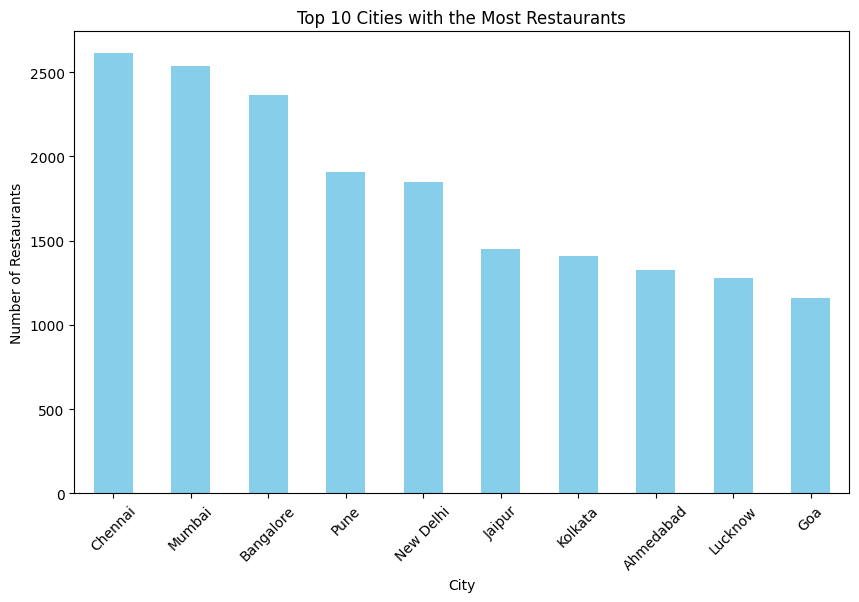

In [29]:
city_counts = df_3['city'].value_counts().head(10)  # Top 10 cities

# Plotting the data
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

## Common Features of Top-Rated Restaurants

<Axes: xlabel='cuisines'>

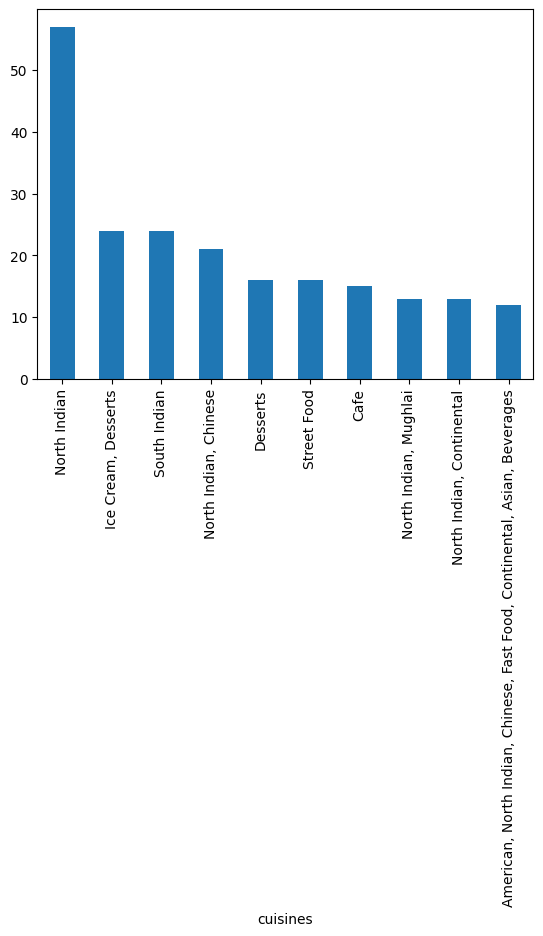

In [30]:
top_rated = df_3[df_3['aggregate_rating'] > 4.5]
top_features = top_rated['cuisines'].value_counts().head(10)
top_features.plot(kind='bar')


## Correlation Between Number of Reviews and Aggregate Rating

<Axes: xlabel='votes', ylabel='aggregate_rating'>

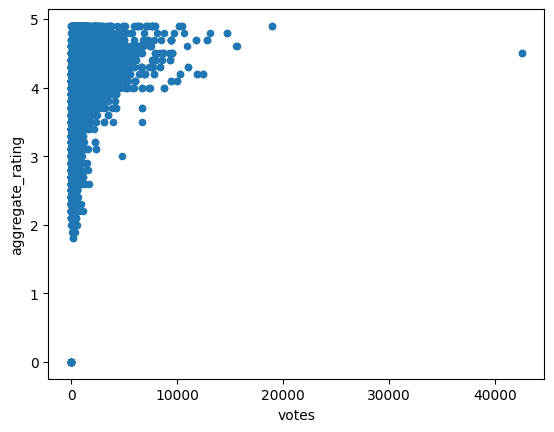

In [31]:
df_3.plot(kind='scatter', x='votes', y='aggregate_rating')


## Variation of Average Cost Among Establishment Types

<Axes: xlabel='establishment'>

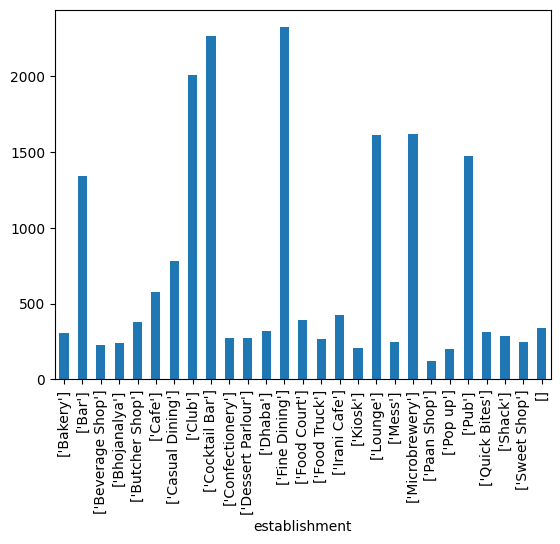

In [32]:
establishment_cost = df_3.groupby('establishment')['average_cost_for_two'].mean()
establishment_cost.plot(kind='bar')


## Unique Selling Points of Most Popular Restaurants:

<Axes: xlabel='cuisines'>

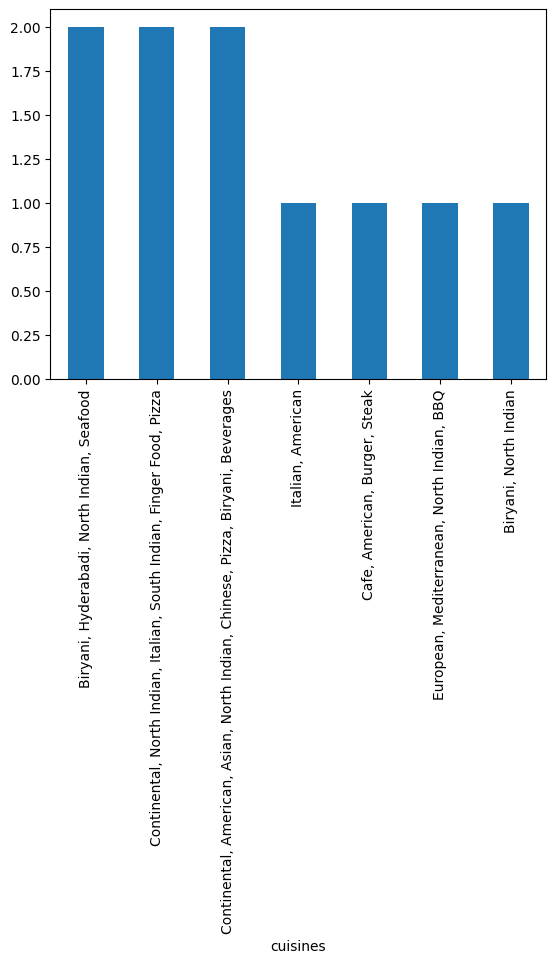

In [33]:
popular_restaurants = df_3.nlargest(10, 'votes')
popular_features = popular_restaurants['cuisines'].value_counts()
popular_features.plot(kind='bar')
